In [2]:
# マイク入力をスピーカー出力するサンプル
import pyaudio

chunk = 1024  # * 2    処理の重さによって値を変える
sr = 48000  # 小さくしていくと音質が悪くなる
speaker = pyaudio.PyAudio()

stream = speaker.open(
    format=pyaudio.paInt16,
    channels=1,
    rate=sr,
    frames_per_buffer=chunk,
    input=True,
    output=True,
)

while stream.is_active():
    I = stream.read(chunk)
    # I = 何かしらの処理(I) 処理を加えるときはchunkをいくらか大きくする

    try:
        O = stream.write(I)
    except KeyboardInterrupt:
        break

stream.stop_stream()
stream.close()
speaker.terminate()


In [3]:
# sin波形を音声出力するサンプル

import numpy as np
import pyaudio

p = pyaudio.PyAudio()

volume = 0.5  # range [0.0, 1.0]
fs = 44100  # sampling rate, Hz, must be integer
duration = 5.0  # in seconds, may be float
f = 1000.0  # sine frequency, Hz, may be float

# generate samples, note conversion to float32 array
samples = (np.sin(2 * np.pi * np.arange(fs * duration) * f / fs)).astype(np.float32)

# for paFloat32 sample values must be in range [-1.0, 1.0]
stream = p.open(format=pyaudio.paFloat32, channels=1, rate=fs, output=True)

# play. May repeat with different volume values (if done interactively)
normalize_samples = volume * samples
stream.write(normalize_samples.tobytes())

stream.stop_stream()
stream.close()

p.terminate()


-9.999999981748587


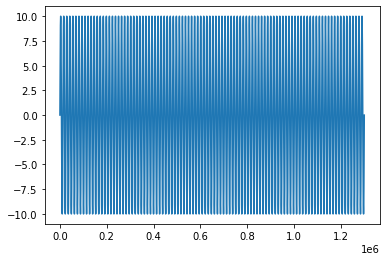

In [5]:
# okusou's 波形サンプル
import math
import struct
import wave
from pprint import pprint

import matplotlib.pyplot as plt
import numpy as np
import pyaudio
import scipy as sc

# 初期変数
freq = 130
num = 2
amp = 10
offset = amp / 2
unitNum = 2
sampleFreq = 44100
durTime = 10  # 持続時間

t = np.linspace(0, unitNum / freq, freq * 100 * unitNum)
signal = np.abs(amp * np.sin(2 * math.pi * freq * t))
# plt.plot(t, signal)
start = 3 / 4
end = 1
signal[int(len(signal) * start) : int(len(signal) * end)] = -signal[
    int(len(signal) * start) : int(len(signal) * end)
]
print(min(signal))
speaker = pyaudio.PyAudio()
chunk = 1024  # * 2    処理の重さによって値を変える
sr = 48000  # 小さくしていくと音質が悪くなる

stream = speaker.open(
    format=pyaudio.paInt16, channels=1, rate=sr, frames_per_buffer=chunk, input=False, output=True
)

# play stream (3)
s = amp * np.sin(2 * math.pi * freq * t)

s5 = [s for i in range(50)]
s5 = np.hstack(s5)
plt.plot(s5)

stream.write(s5)

# s10 = np.repeat(s, 3, axis=0)
# print(s10)

# plt.plot(s10)

# while True:
#     stream.write(np.sin(t))

# for i in range():
#     stream.write(signal)